In [1]:
import imageio
import numpy as np
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
from skimage import color
from skimage import io

In [2]:
im1_goc = imageio.imread('D:\HK2_2021\TT_XLA\CUOI KY\image1.jpg')
im2_goc = imageio.imread('D:\HK2_2021\TT_XLA\CUOI KY\image2.jpg')
im1 = color.rgb2gray(io.imread('D:\HK2_2021\TT_XLA\CUOI KY\image1.jpg'))
im2 = color.rgb2gray(io.imread('D:\HK2_2021\TT_XLA\CUOI KY\image2.jpg'))

Text(0.5, 1.0, 'Ảnh test chuyển sang ảnh xám')

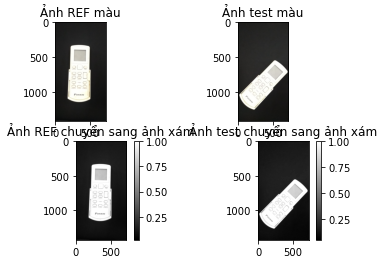

In [3]:
plt.figure()
plt.subplot(2,2,1)
plt.imshow(im1_goc)
plt.title("Ảnh REF màu")
plt.subplot(2,2,2)
plt.imshow(im2_goc)
plt.title("Ảnh test màu")

plt.subplot(2,2,3)
plt.imshow(im1, cmap='gray')
plt.colorbar()
plt.title("Ảnh REF chuyển sang ảnh xám")
plt.subplot(2,2,4)
plt.imshow(im2, cmap='gray')
plt.colorbar()
plt.title("Ảnh test chuyển sang ảnh xám")

(1424, 724) (1424, 724)
Hệ số: 0.023529411764705882 1.0 0.05154588235294118 1.0


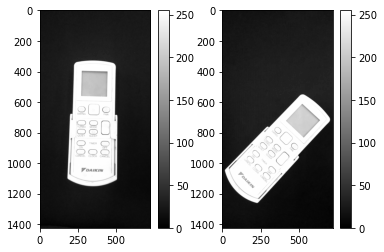

In [4]:
image1=np.zeros(im1.shape, dtype='uint8')
image2=np.zeros(im2.shape, dtype='uint8')
print(image1.shape, image2.shape)
min1=im1.min()
max1=im1.max()
min2=im2.min()
max2=im2.max()
print("Hệ số:", min1, max1, min2, max2)
for i in range(im1.shape[0]):
    for j in range(im1.shape[1]):
        r=im1[i,j]
        image1[i,j]=r*(255/(1-min1))+((255*min1)/(min1-1))
for i in range(im2.shape[0]):
    for j in range(im2.shape[1]):
        r=im2[i,j]
        image2[i,j]=r*(255/(1-min2))+((255*min2)/(min2-1))
plt.figure()
plt.subplot(1,2,1)
plt.imshow(image1,cmap='gray')
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(image2,cmap='gray')
plt.colorbar()

MAE: 0.21070228598919857


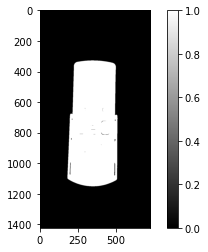

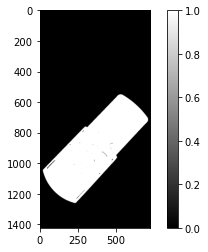

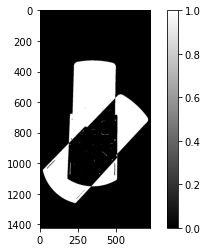

In [5]:
# a: Tinh ERR RAW
# Convert binary
def convert_bin(q):
    mask=q>100
    return mask
im_bin1= convert_bin(image1)
im_bin2= convert_bin(image2)

# Calculate absolute image difference
abs_err = np.abs(im_bin1.astype('int') - im_bin2.astype('int'))


# Calculate mean absolute error
mean_abs_err = np.mean(abs_err)
print('MAE:', mean_abs_err)

plt.figure()
plt.imshow(im_bin1, cmap="gray")
plt.colorbar()
plt.figure()
plt.imshow(im_bin2, cmap='gray')
plt.colorbar()
plt.figure()
plt.imshow(abs_err, cmap='gray')
plt.colorbar()

In [6]:
# b: Tìm tâm và dịch tâm
# Tìm tâm ảnh ref
mask1 = np.where(image1>100, 1, 0)
# Label the objects in "mask"
labels1, nlabels1 = ndi.label(mask1)
print('Num. Labels:', nlabels1)
# Find image center of mass
com1 = ndi.center_of_mass(labels1, labels1, index=1)
print(com1[0], com1[1])

Num. Labels: 1
750.4407061023102 348.36306586906676


In [7]:
# Tìm tâm ảnh test cần dịch
mask2 = np.where(image2>100, 1, 0)
# Label the objects in "mask"
labels2, nlabels2 = ndi.label(mask2)
print('Num. Labels:', nlabels2)
# Find image center of mass
com2 = ndi.center_of_mass(labels2, labels2, index=1)

# Calculate amount of shift needed
d02 = com1[0]-com2[0]
d12 = com1[1]-com2[1]
print(com2[0], com2[1], d02, d12)

Num. Labels: 1
909.0620608241048 354.47800607116756 -158.62135472179466 -6.114940202100797


In [8]:
# Tâm ảnh sau khi dịch (in ra so sánh với tâm ảnh ref)
im_trans = ndi.shift(image2, shift=(d02, d12))
mask = np.where(im_trans>100, 1, 0)
labels, nlabels = ndi.label(mask)
print('Num. Labels:', nlabels)
com = ndi.center_of_mass(labels, labels, index=1)

print(com[0], com[1])

Num. Labels: 1
750.4302529274005 348.37636533957846


Text(0.5, 1.0, 'Ảnh dịch tâm')

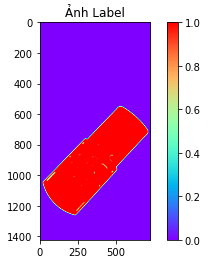

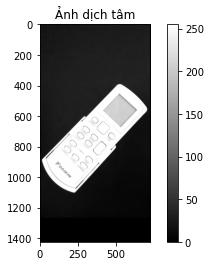

In [9]:
plt.figure()
plt.imshow(labels2, cmap='rainbow')
plt.colorbar()
plt.title("Ảnh Label")
plt.figure()
plt.imshow(im_trans, cmap='gray')
plt.colorbar()
plt.title("Ảnh dịch tâm")

In [10]:
im_bin2_l2= convert_bin(im_trans)

# Calculate absolute image difference
abs_err_l2 = np.absolute(im_bin1.astype('int')- im_bin2_l2.astype('int'))

# Calculate mean absolute error
mean_abs_err_l2 = np.mean(np.abs(im_bin1.astype('int') - im_bin2_l2.astype('int')))
print('MAE:', mean_abs_err_l2)

MAE: 0.19213153361474952


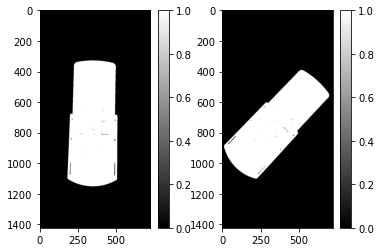

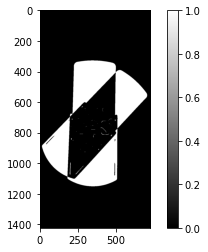

In [11]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(im_bin1, cmap="gray")
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(im_bin2_l2, cmap='gray')
plt.colorbar()
plt.figure()
plt.imshow(abs_err_l2, cmap='gray')
plt.colorbar()

In [12]:
mae=[]
for i in range(360):
    im_ro = ndi.rotate(im_trans, angle=-i, reshape=False)
    im_bin2_new = convert_bin(im_ro)
    mean_abs_err_l2 = np.mean(np.abs(im_bin1.astype('int') - im_bin2_new.astype('int')))
    mae.append(mean_abs_err_l2)
    print('MAE:',[i, mean_abs_err_l2])

MAE: [0, 0.19213153361474952]
MAE: [1, 0.19610446799925507]
MAE: [2, 0.19987565180954744]
MAE: [3, 0.20360124774970514]
MAE: [4, 0.20725021726984916]
MAE: [5, 0.21085165901049102]
MAE: [6, 0.21429693804705444]
MAE: [7, 0.21764134179651126]
MAE: [8, 0.2208392823887268]
MAE: [9, 0.22380831367558507]
MAE: [10, 0.226565894841393]
MAE: [11, 0.22918477248742938]
MAE: [12, 0.2316242085169781]
MAE: [13, 0.2339288208454901]
MAE: [14, 0.23606854087777018]
MAE: [15, 0.238068587435595]
MAE: [16, 0.23993866006580172]
MAE: [17, 0.24166226953876715]
MAE: [18, 0.24334514091501644]
MAE: [19, 0.24489803836364765]
MAE: [20, 0.24635976007200944]
MAE: [21, 0.24772254640263208]
MAE: [22, 0.24902616549754794]
MAE: [23, 0.2501881712086411]
MAE: [24, 0.2513336876901111]
MAE: [25, 0.25236280960953505]
MAE: [26, 0.25332888447451735]
MAE: [27, 0.2542231826929046]
MAE: [28, 0.25505249394748275]
MAE: [29, 0.2558090586007822]
MAE: [30, 0.25652391520268175]
MAE: [31, 0.25717378484077225]
MAE: [32, 0.2577897060649326]

In [13]:
print([min(mae),mae.index(min(mae))])

[0.05268211869141474, 321]


Text(0.5, 1.0, 'Ảnh xoay')

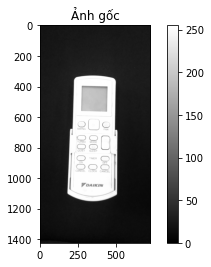

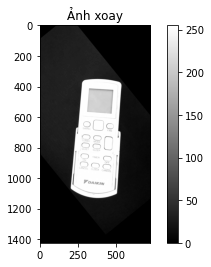

In [14]:
im_ro = ndi.rotate(im_trans, angle=-321, reshape=False)
plt.figure()
plt.imshow(image1, cmap='gray')
plt.colorbar()
plt.title("Ảnh gốc")
plt.figure()
plt.imshow(im_ro, cmap='gray')
plt.colorbar()
plt.title("Ảnh xoay")